# Sepsis Survival Prediction Using Decision Tree Ensembles

**Code authored by**: Shawhin Talebi <br>
**Article link**: https://medium.com/towards-data-science/decision-trees-introduction-intuition-dac9592f4b7f <br>
**Data source**: 
- UCI: https://archive.ics.uci.edu/ml/datasets/Sepsis+survival+minimal+clinical+records
- Chicco, D., Jurman, G. Survival prediction of patients with sepsis from age, sex, and septic episode number alone. Sci Rep 10, 17156 (2020). https://doi.org/10.1038/s41598-020-73558-3

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

### Data prep

In [2]:
df = pd.read_csv('sandbox/raw/s41598-020-73558-3_sepsis_survival_primary_cohort.csv')
df_validation = pd.read_csv('sandbox/raw/s41598-020-73558-3_sepsis_survival_study_cohort.csv')

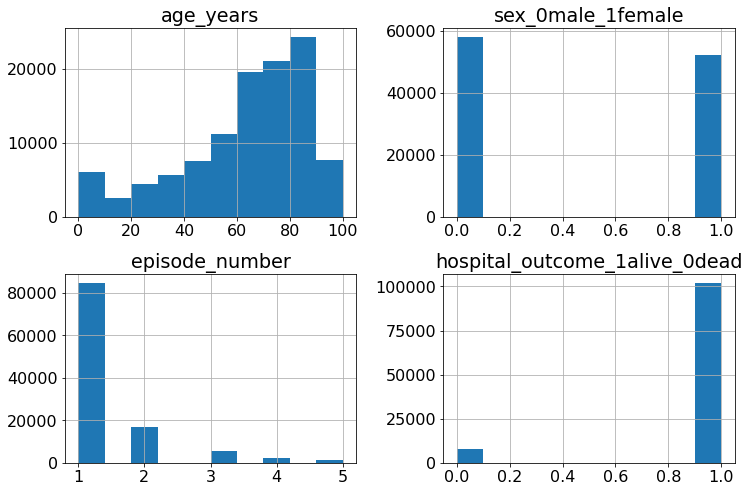

In [3]:
plt.rcParams.update({'font.size': 16})

df.hist(figsize=(12,8))
plt.savefig('visuals/raw_histograms.png',facecolor='white',bbox_inches="tight")

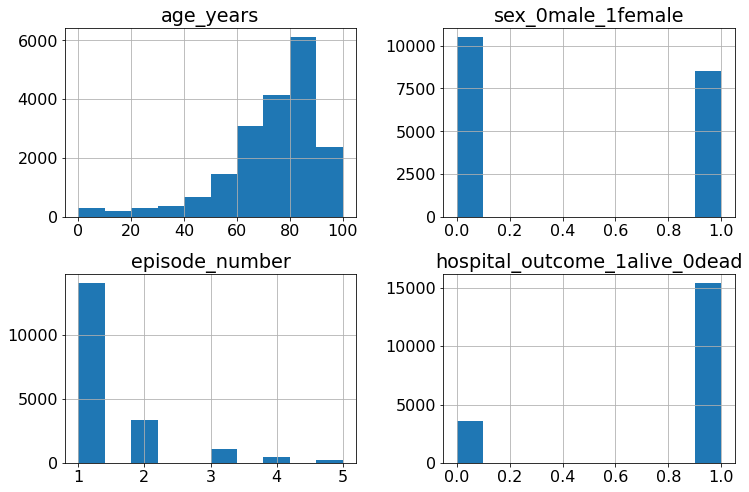

In [4]:
plt.rcParams.update({'font.size': 16})

df_validation.hist(figsize=(12,8))
plt.show()

#### Balance data using SMOTE

In [5]:
# define predictor and target variable names
X_var_names = df.columns[:3]
y_var_name = df.columns[3]

# create predictor and target arrays
X = df[X_var_names]
y = df[y_var_name]

# oversample minority class using smote
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

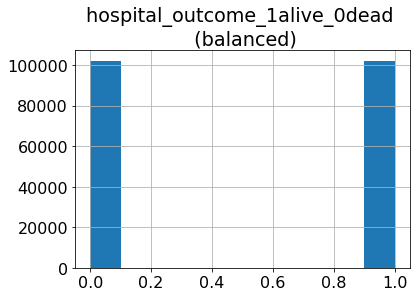

In [6]:
y_resampled.hist(figsize=(6,4))
plt.title('hospital_outcome_1alive_0dead \n (balanced)')
plt.show()

#### Train-test split

In [7]:
# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [8]:
# create validation dataset
X_validation = df_validation[X_var_names]
y_validation = df_validation[y_var_name]

In [9]:
X_train.shape

(163358, 3)

In [10]:
X_test.shape

(40840, 3)

In [11]:
X_validation.shape

(19051, 3)

### Model Development

In [12]:
clf_list = []
model_name_list = ['DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier']

# train model
for model_name in model_name_list:

    # dynamically write command to train each classifier in model_name_list
    cmd = 'clf = ' + model_name + '(random_state=0)'
    print(cmd)    # print command
    exec(cmd)     # execute command
    
    # fit data to model
    clf = clf.fit(X_train, y_train)
    
    # append classifier to list
    clf_list.append(clf)

clf = DecisionTreeClassifier(random_state=0)
clf = RandomForestClassifier(random_state=0)
clf = AdaBoostClassifier(random_state=0)
clf = GradientBoostingClassifier(random_state=0)


In [13]:
clf_list

[DecisionTreeClassifier(random_state=0),
 RandomForestClassifier(random_state=0),
 AdaBoostClassifier(random_state=0),
 GradientBoostingClassifier(random_state=0)]

##### Evaluate performance

In [14]:
performance_dict = {}

dataset_name_list = ['train', 'test', 'validation']

for i in range(len(model_name_list)):
    
    clf = clf_list[i]
    
    prec_val_list = []
    col_name_list = []
    
    for dataset_name in dataset_name_list:

        cmd = 'y_pred_' + dataset_name + ' = clf.predict(X_' + dataset_name + ')'
        print(cmd)
        exec(cmd)
        
        cmd = 'prec_val_list.append(precision_score(y_' + dataset_name + ', y_pred_' + dataset_name + '))'
        print(cmd)
        exec(cmd)
        print('')
        
        col_name_list.append('Precision_' + dataset_name)

    performance_dict[model_name_list[i]] = prec_val_list
    
df_performance = np.round(pd.DataFrame.from_dict(performance_dict, orient='index', columns=col_name_list),3)

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
prec_val_list.append(precision_score(y_test, y_pred_test))

y_pred_validation = clf.predict(X_validation)
prec_val_list.append(precision_score(y_validation, y_pred_validation))

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
prec_val_list.append(precision_score(y_test, y_pred_test))

y_pred_validation = clf.predict(X_validation)
prec_val_list.append(precision_score(y_validation, y_pred_validation))

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
prec_val_list.append(precision_score(y_test, y_pred_test))

y_pred_validation = clf.predict(X_validation)
prec_val_list.append(precision_score(y_validation, y_pred_validation))

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_sco

In [15]:
df_performance

,Precision_train,Precision_test,Precision_validation
DecisionTreeClassifier,0.715,0.711,0.878
RandomForestClassifier,0.716,0.713,0.877
AdaBoostClassifier,0.681,0.683,0.864
GradientBoostingClassifier,0.702,0.702,0.869


While Random Forest performs (marginally) better than a single decision tree here, boosting methods perform worse.

This is could be explained by the small number of predictors available in the dataset.